
References:

- https://matplotlib.org/gallery/images_contours_and_fields/image_demo.html
- https://en.wikipedia.org/wiki/Domain_coloring
- https://en.wikipedia.org/wiki/HSL_and_HSV

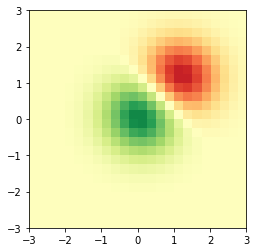

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

d = 0.25
x = y = np.arange(-3, 3, d)
X, Y = np.meshgrid(x, y)
Z0 = np.exp(- X**2 - Y**2)
Z1 = np.exp(- (X - 1)**2 - (Y - 1)**2)
Z = (Z0 - Z1) * 2

plt.imshow(Z, interpolation='none', extent=[-3, 3, -3, 3],
           origin='lower', vmax=2, vmin=-2,
           cmap=cm.RdYlGn)

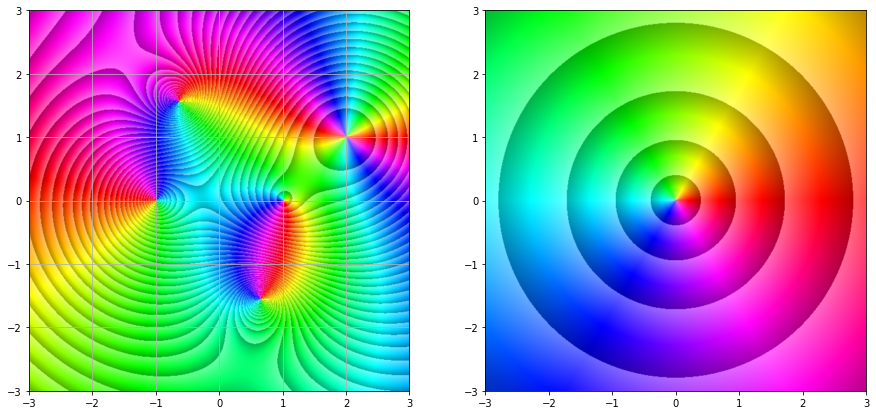

In [25]:
i = np.complex(0, 1)
f = lambda x: (x**2 - 1) * (x - 2 - i)**2 / (x**2 + 2 + 2*i)

def complex2rgb(c, scale=2, layered=False):
    # complex to hsl
    h = np.angle(c)
    h = h + (h < 0) * 2 *np.pi # 0 to 2pi
    s = 1
    if scale == -1:
        l = 1
    elif layered:
        l = np.modf(np.log(np.abs(c) + 1) * scale)[0]
        def _inv_lerp(x, y, s):
            return (y - x) * s + x
        l = _inv_lerp(0.7, 0.35, l)
    else:
        l = 1 - scale**(-np.abs(c))
    # hsl to rgb
    c = (1 - np.abs(2 * l - 1)) * s
    m = l - c / 2
    h_ = h / (np.pi / 3) # hue as 0 to 6
    x = c * (1 - np.abs((h_ % 2) - 1))
    bs = [((i <= h_) & (h_ <= i + 1)) for i in range(6)]
    r = (bs[5] | bs[0]) * c + (bs[1] | bs[4]) * x + m
    g = (bs[1] | bs[2]) * c + (bs[3] | bs[0]) * x + m
    b = (bs[3] | bs[4]) * c + (bs[5] | bs[2]) * x + m
    return np.stack([r, g, b], axis=-1)

_, axes = plt.subplots(1, 2, figsize=(15, 15))
d = 0.01
domain = np.array([-1, 1, -1, 1]) * 3
re = np.arange(*domain[0:2], d)
im = np.arange(*domain[2:4], d)
X, Y = np.meshgrid(re, im)
Z = f(X + i*Y)
axes[0].imshow(complex2rgb(Z, scale=8, layered=True), interpolation='bilinear', extent=domain, origin='lower')
axes[0].grid(True)
axes[1].imshow(complex2rgb(X + i*Y, scale=3, layered=True), interpolation='bilinear', extent=domain, origin='lower')
plt.show()

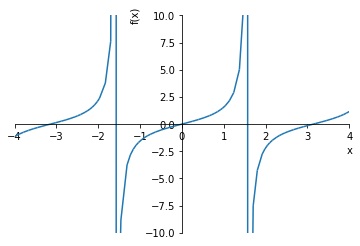

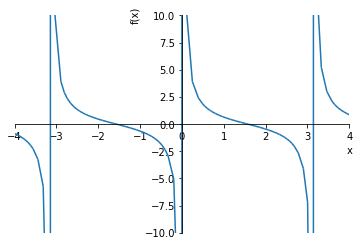

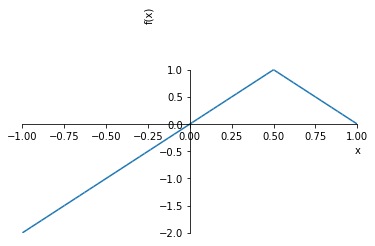

In [8]:
import sympy as sp
sp.init_printing()
x = sp.symbols('x')
sp.plot(sp.tan(x), (x, -4, 4), ylim=(-10, 10))
sp.plot(sp.cot(x), (x, -4, 4), ylim=(-10, 10))
sp.plot(1 - sp.Abs(2 * x - 1), (x, -1, 1), ylim=(-2, 2))